In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import plotly.express as px

In [164]:
df_co2 = pd.read_csv("top_co2.csv")
df_inc = pd.read_csv("top_income.csv")

Merging and Visualizing the data

In [165]:
df = pd.merge(df_inc, df_co2, how ='inner', on =['Country Name', 'Year'])
df

,Country Name,Year,GDP_per_capita_USD,CO2
0,Afghanistan,2002,179.426579,0.05
1,Afghanistan,2003,190.683814,0.05
2,Afghanistan,2004,211.382074,0.04
3,Afghanistan,2005,242.031313,0.06
4,Afghanistan,2006,263.733602,0.07
...,...,...,...,...
4133,Zimbabwe,2015,1445.069702,0.90
4134,Zimbabwe,2016,1464.588957,0.79
4135,Zimbabwe,2017,1235.189032,0.73
4136,Zimbabwe,2018,1254.642265,0.86


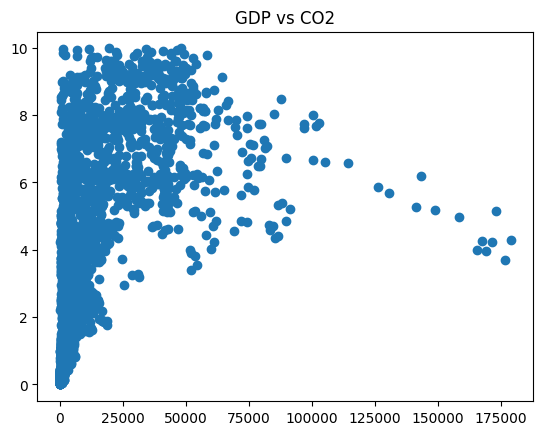

In [167]:
plt.plot()
plt.title('GDP vs CO2')
plt.scatter(df['GDP_per_capita_USD'], df['CO2'])
plt.show()

 Building the clustering model and calculating the values of the Distortion and Inertia

In [168]:
X = np.array(list(zip(df['GDP_per_capita_USD'], df['CO2']))).reshape(len(df['GDP_per_capita_USD']), 2)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

Tabulating and Visualizing the results

In [169]:
#Using the different values of Distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 9743.153410688088
2 : 5090.295292154091
3 : 4254.915647411579
4 : 3362.74514976929
5 : 2769.5355616781326
6 : 2199.9953190068295
7 : 1787.1738168889078
8 : 1547.1016874134048
9 : 1479.8761402978173


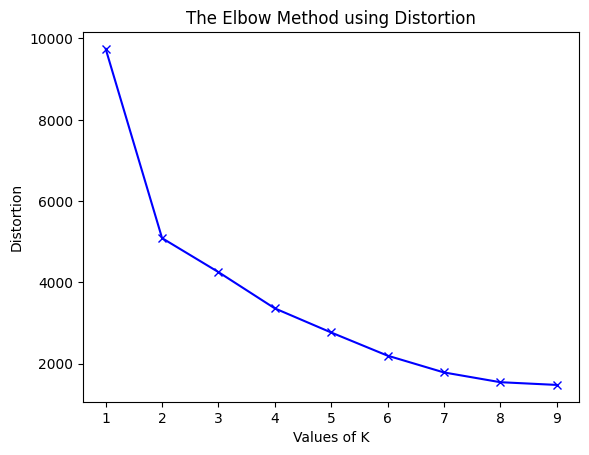

In [170]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [171]:
#Using the different values of Inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1128143912814.871
2 : 372364682363.79956
3 : 189380439342.60608
4 : 117002859119.05151
5 : 67264818169.04902
6 : 43272271960.28779
7 : 32670865475.829884
8 : 24741681225.000423
9 : 20199214433.29331


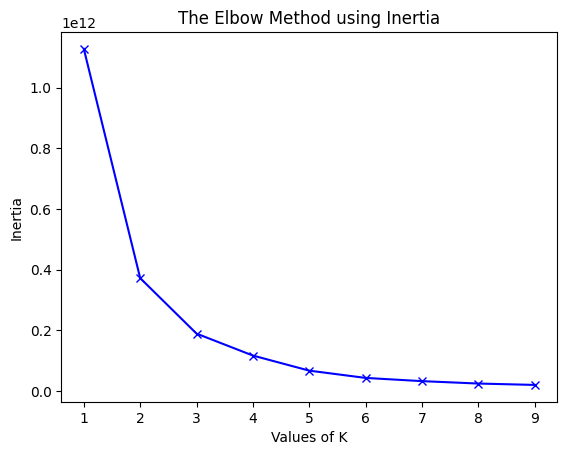

In [172]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

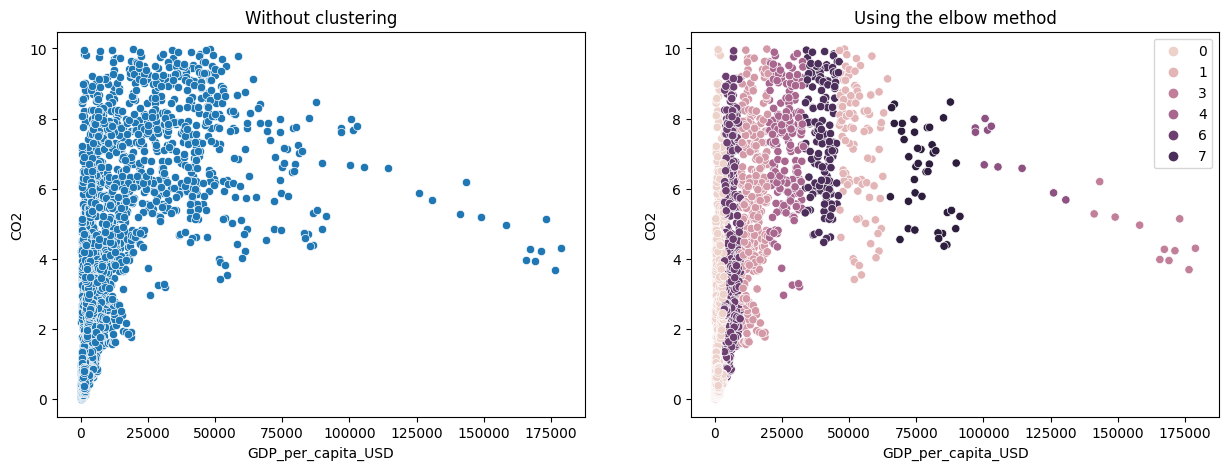

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='GDP_per_capita_USD', y='CO2').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='GDP_per_capita_USD', y='CO2', hue=kmeanModel.labels_).set_title('Using the elbow method');